# **Author: Dr. Mohammad Javad Parseh (Jahrom University)**

## Segmentation

### Introduction

***Segmentation*** is the process of separating an image into multiple logical regions. The regions can be defined as pixels sharing similar characteristics such as `intensity`, `texture`, etc. There are many methods of segmentation. They can be classified as follows:

* Histogram-based segmentation

* Region-based segmentation

* Edge segmentation

* Differential equation-based methods

* Contour methods

* Graph partitioning methods

* Model based segmentation

* Clustering methods, etc.

In this chapter, we discuss **histogram** and **region-based** and **contour** segmentation methods.

## Histogram-Based Segmentation

In the ***histogram-based method*** a threshold is determined by using the histogram of the image. Each pixel in the image is compared with the threshold value. If the pixel intensity is less than the threshold value, then the corresponding pixel in the segmented image is assigned a value of `zero`. If the pixel intensity is greater than the threshold value, then the corresponding pixel in the segmented image is assigned a value of `one`.

### Otsu’s Method

***Otsu’s method*** works best if the histogram of the image is **bi-modal**, but can be applied to other histograms as well. A ***bi-modal histogram*** is a type of histogram containing two distinct peaks separated by a valley. One peak is the background and the other is the foreground. Otsu’s algorithm searches for a threshold value that maximizes the variance between the two groups foreground and background, so that the threshold value can better segment the foreground from the background.

True

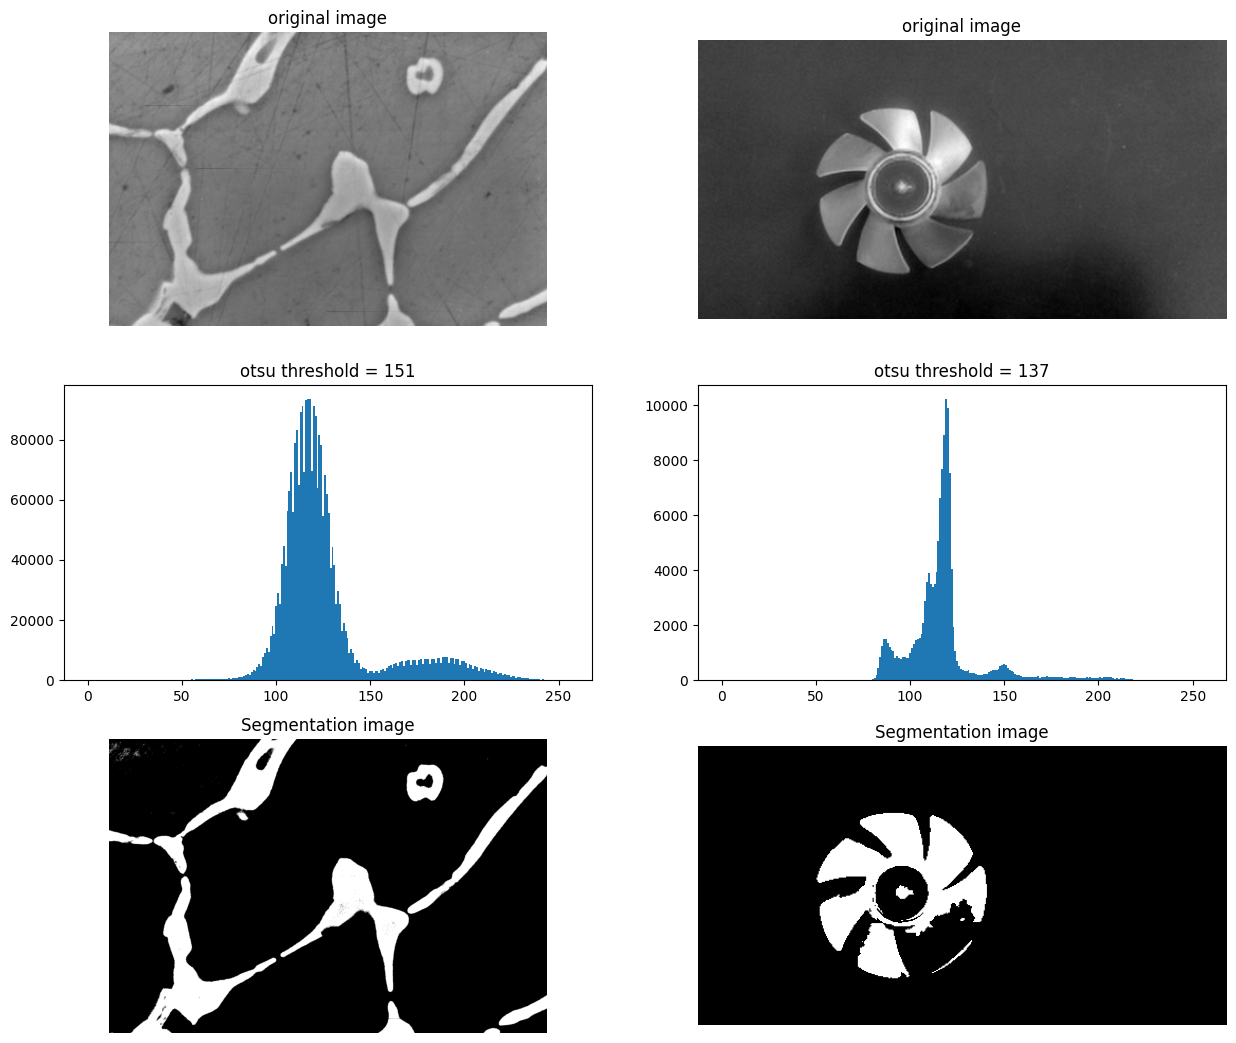

In [1]:
import cv2
from PIL import Image
from skimage.filters.thresholding import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import os

base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter08'
# Opening the image and converting it to grayscale.
a1 = Image.open(os.path.join(base_path, 'images/sem3.png')).convert('L')
a1 = np.asarray(a1)
thresh1 = threshold_otsu(a1)
# Pixels with intensity greater than the "threshold" are kept.
b1 = 255*(a1 > thresh1)

# Opening the image and converting it to grayscale.
a2 = Image.open(os.path.join(base_path, 'images/spinwheel.png')).convert('L')
a2 = np.asarray(a2)
thresh2 = threshold_otsu(a2)
# Pixels with intensity greater than the "threshold" are kept.
b2 = 255*(a2 > thresh2)

# Show Images
plt.figure(figsize=(15,13))
plt.subplot(3,2,1)
plt.title('original image')
plt.imshow(a1, cmap='gray')
plt.axis('off')

plt.subplot(3,2,2)
plt.title('original image')
plt.imshow(a2, cmap='gray')
plt.axis('off')

x = a1.ravel()
plt.subplot(3,2,3)
plt.title('otsu threshold = ' + str(thresh1))
plt.hist(x,256,[0,255])

x = a2.ravel()
plt.subplot(3,2,4)
plt.title('otsu threshold = ' + str(thresh2))
plt.hist(x,256,[0,255])

plt.subplot(3,2,5)
plt.title('Segmentation image')
plt.imshow(b1, 'gray')
plt.axis('off')

plt.subplot(3,2,6)
plt.title('Segmentation image')
plt.imshow(b2, 'gray')
plt.axis('off')

# Saving e as ilowpass_output.png in Figures folder .
cv2.imwrite('segment1.png', b1)
cv2.imwrite('segment.png', b2)

### Renyi Entropy

***Renyi entropy-based segmentation*** is very useful when the object of interest is small compared to the whole image i.e., the threshold is at the right tail of the histogram.

The histogram of the image is used as an independent random variable to determine the threshold. The histogram is normalized by dividing each frequency with the total number of pixels in the image. This will ensure that the sum of the frequencies after normalization is one. This is the **probability distribution function (pdf)** of the histogram. The Renyi entropy can then be calculated for this pdf.

The Renyi entropy is calculated for all pixels below and above the threshold. These will be referred to as background entropy and foreground entropy respectively. This process is repeated for all the pixel values in the pdf. The total entropy is calculated as the sum of background entropy and foreground entropy for each pixel value in the pdf. The graph of the total entropy has one absolute maximum. The threshold value corresponding to that absolute maximum is the threshold (t) for segmentation.

In [6]:
import cv2
import os
from PIL import Image
import numpy as np
import skimage.exposure as imexp
import matplotlib.pyplot as plt

# Defining function
def renyi_seg_fn(im, alpha):
    hist, _ = imexp.histogram(im)
    # Convert all values to float
    hist_float = np.array([float(i) for i in hist])
    # compute the pdf
    pdf = hist_float/np.sum(hist_float)
    # compute the cdf
    cumsum_pdf = np.cumsum(pdf)
    s, e = im.min(), im.max()
    print(s,e)
    scalar = 1.0/(1.0-alpha)
    # A very small value to prevent error due to log(0).
    eps = np.spacing(1)
    rr = e-s
    # The inner parentheses is needed because the parameters are tuple.
    h1 = np.zeros((rr, 1))
    h2 = np.zeros((rr, 1))
    # The following loop computes h1 and h2 values used to compute the entropy.
    for ii in range(1, rr):
        iidash = ii+s
        temp0 = pdf[0:iidash]/(cumsum_pdf[iidash])
        temp1 = np.power(temp0, alpha)
        h1[ii] = np.log(np.sum(temp1)+eps)
        temp0 = pdf[iidash+1:e]/(1.0-cumsum_pdf[iidash])
        temp2 = np.power(temp0, alpha)
        h2[ii] = np.log(np.sum(temp2)+eps)
    T = h1+h2
    # Entropy value is calculated
    T = T*scalar
    T = T.reshape((rr, 1))[:-2]
    # location where the maximum entropy occurs is the threshold for the renyi entropy
    thresh = T.argmax(axis=0)
    return thresh


0 255
The renyi threshold is:  220


True

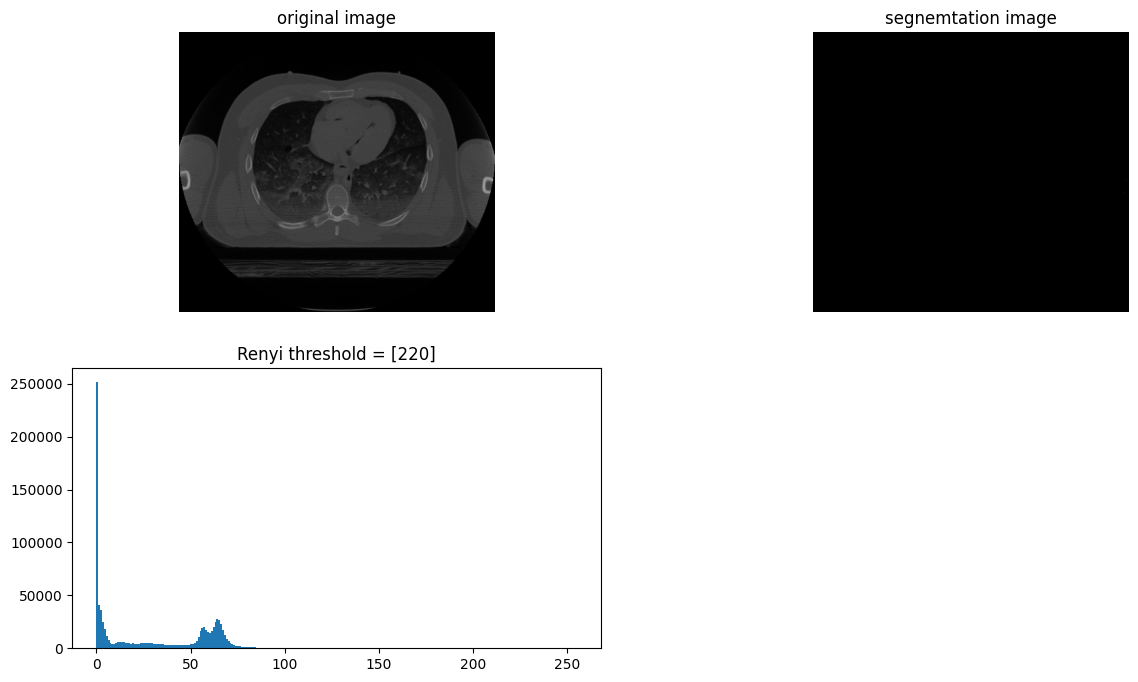

In [8]:
# Main program
# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter08'
a = Image.open(os.path.join(base_path, 'images/CT.png')).convert('L')
a = np.array(a)
# Computing the threshold by calling the function.
thresh = renyi_seg_fn(a, 3)
print('The renyi threshold is: ', thresh[0])
b = 255*(a > thresh)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(a, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('segnemtation image')
plt.imshow(b, cmap='gray')
plt.axis('off')

x = a.ravel()
plt.subplot(2,2,3)
plt.title('Renyi threshold = ' + str(thresh))
plt.hist(x,256,[0,255])

# Saving the image as renyi_output.png
cv2.imwrite('renyi_output.png', b)

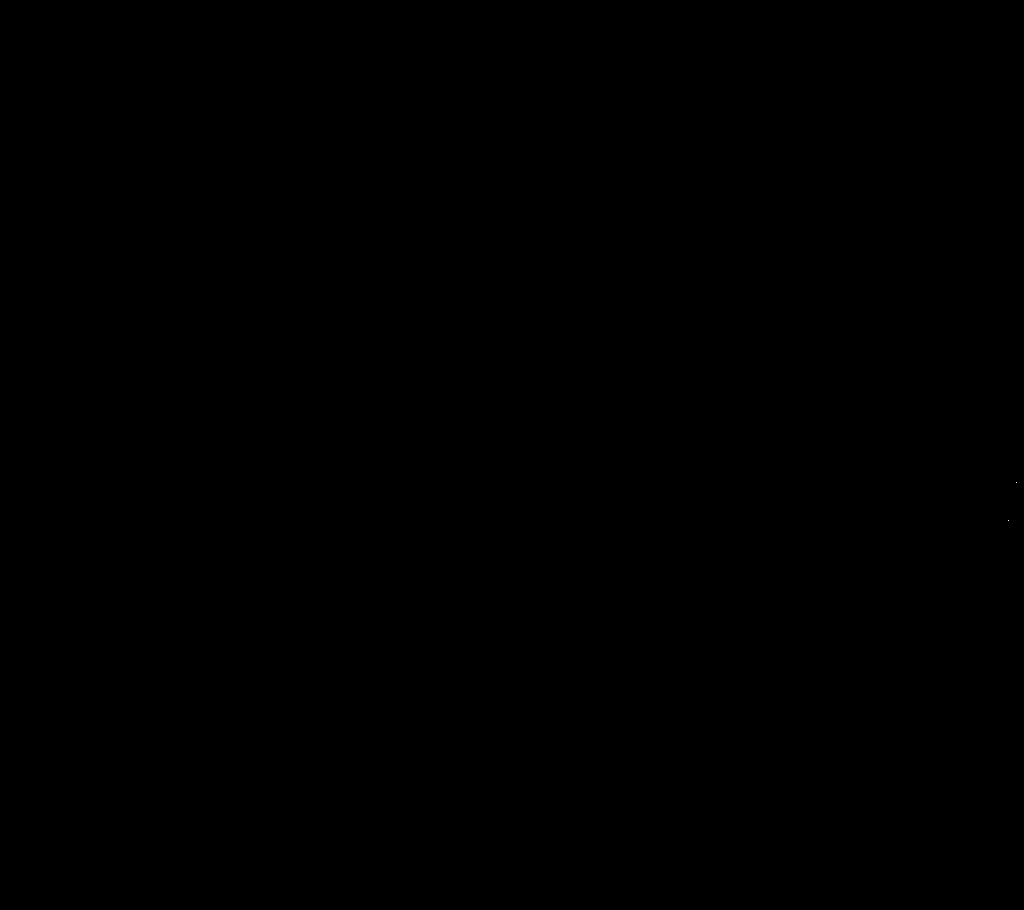

In [9]:
import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(b)

### Adaptive Thresholding

In ***adaptive thresholding***, the image is first divided into many sub-images. The threshold value for each sub-image is computed and is used to segment the sub-image. The threshold value for the sub-image can be computed using the `mean` or `median` or `Gaussian` methods. In the case of the mean method, the mean of the sub-image is used as a threshold, while for the median method, the median of the sub-image is used as a threshold.

True

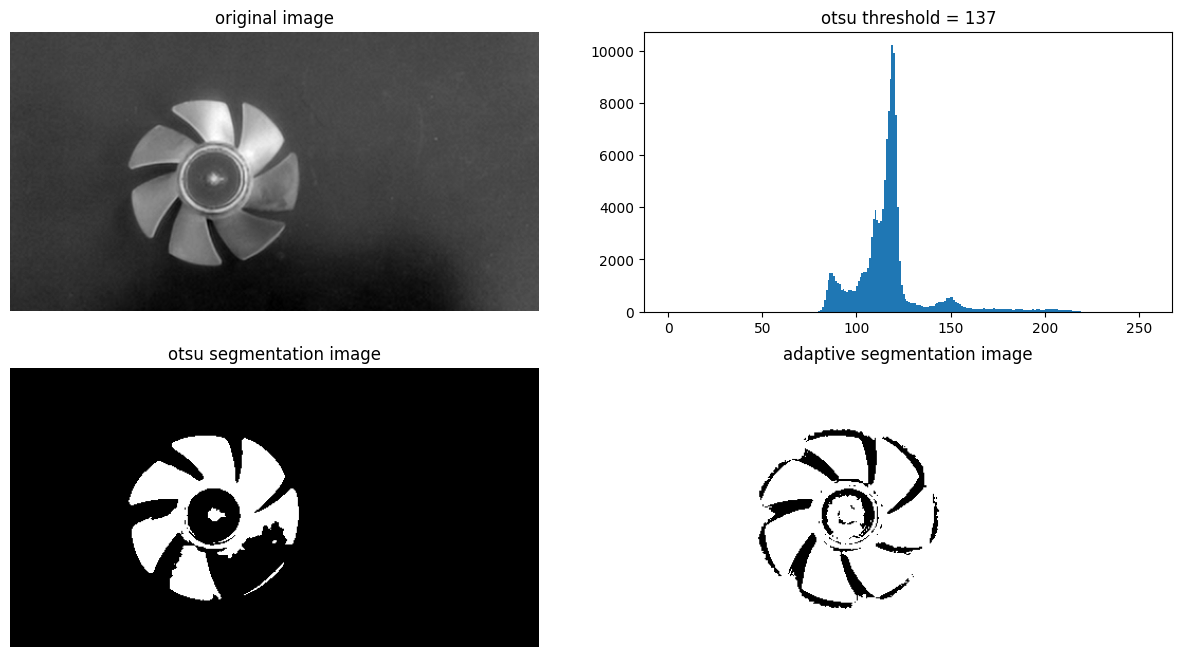

In [4]:
import cv2
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.filters.thresholding import threshold_otsu

# Opening the image and converting it to grayscale.
base_path = '/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter08'
#a1 = Image.open(os.path.join(base_path, 'images/adaptive_example1.png')).convert('L')
a1 = Image.open(os.path.join(base_path, 'images/spinwheel.png')).convert('L')
a1 = np.asarray(a1)

# Performing adaptive thresholding.
b1 = cv2.adaptiveThreshold(a1,a1.max(), cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,10)
# Performing otsu thresholding.
thresh1 = threshold_otsu(a1)
b2 = 255*(a1 > thresh1)

# Show Images
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.title('original image')
plt.imshow(a1, cmap='gray')
plt.axis('off')

x = a1.ravel()
plt.subplot(2,2,2)
plt.title('otsu threshold = ' + str(thresh1))
plt.hist(x,256,[0,255])

plt.subplot(2,2,3)
plt.title('otsu segmentation image')
plt.imshow(b2, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('adaptive segmentation image')
plt.imshow(b1, 'gray')
plt.axis('off')

# Saving the image as adaptive_output.png in the folder Figures.
cv2.imwrite('adaptive_output.png', b1)
cv2.imwrite('otsu_output.png', b2)

## Region-Based Segmentation

A ***region*** is a group or collection of pixels that have similar properties sharing the same characteristics. The characteristics can be pixel ***intensities***, ***texture***, or some other physical feature.

To segment the regions, we need some a ***priori information***. This a priori information is the seed pixels, pixels that are part of the foreground. The seed pixels grow by considering the pixels in their neighborhood that have similar properties. This process connects all the
pixels in a region with similar properties. The region-growing process will terminate when there are no more pixels to add that share the
same characteristics of the region.

It might not always be possible to have a priori knowledge of the
seed pixels. In such cases, a list of characteristics of different regions should be considered. Then pixels that satisfy the characteristics of a particular region will be grouped together. The most popular regionbased segmentation method is watershed segmentation.

### Watershed Segmentation

To perform ***watershed segmentation***, let’s consider a grayscale image as an example. The grayscale values of the image represent the peaks and valleys of the topographic terrain of the image. The lowest valley in an object is the absolute minimum. The highest grayscale value corresponds to the highest point in the terrain. The watershed segmentation can be explained as follows: all the points in a region where, if a drop of water was place,d will settle to the absolute minimum are known as the catchment basin of that minimum or watershed. If water is supplied at a uniform rate from the absolute minimum in an object, as water fills up the object, at some point water will overflow into other objects. Dams are constructed to stop water from overflowing into other objects/regions. These dams are the watershed segmentation lines. The watershed segmentation lines are edges that separate one object from another.

(-0.5, 251.5, 311.5, -0.5)

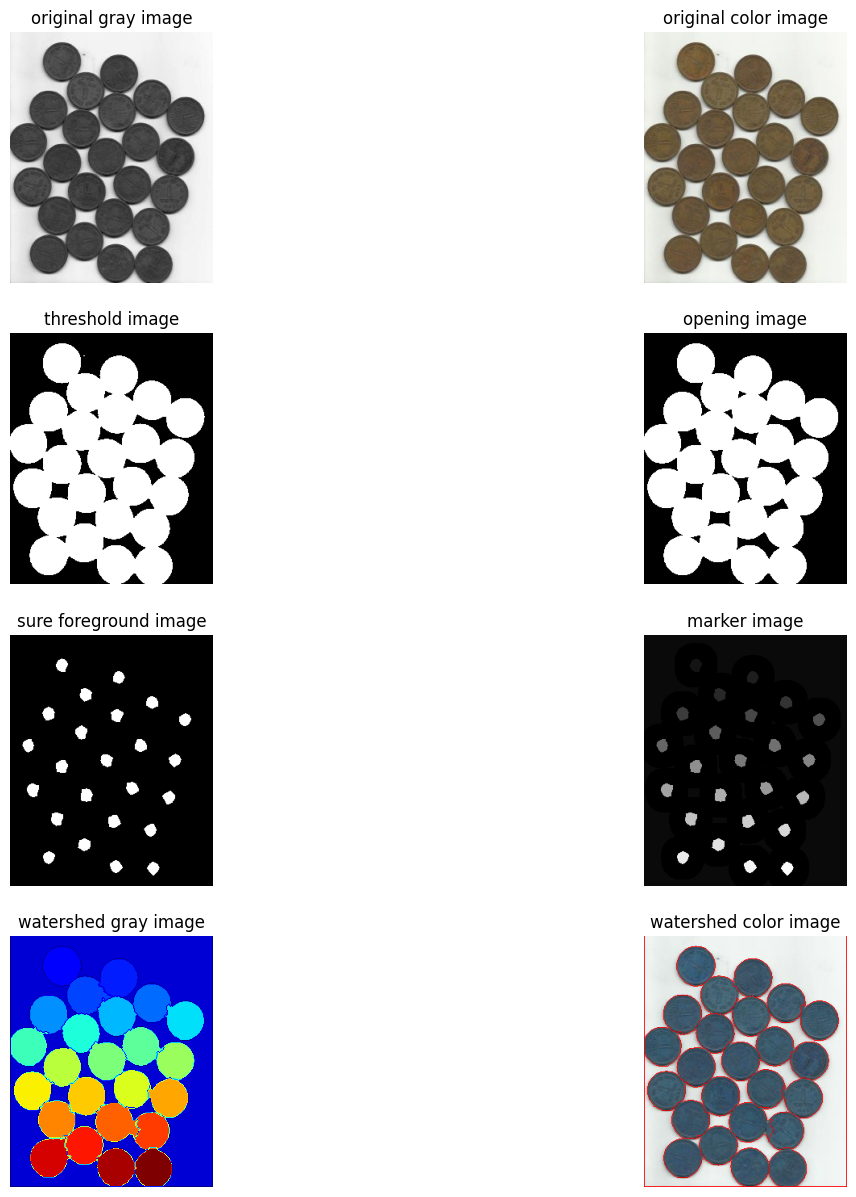

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/water_coins.jpg')
#img = cv.imread('/content/drive/MyDrive/Image Processing and Acquisition using Python/Chapter08/images/cellimage.png')
img1 = img.copy()
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
marker1 = markers.copy()
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

#show images
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
plt.title('original gray image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(4,2,2)
plt.title('original color image')
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(4,2,3)
plt.title('threshold image')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.subplot(4,2,4)
plt.title('opening image')
plt.imshow(opening, cmap='gray')
plt.axis('off')

plt.subplot(4,2,5)
plt.title('sure foreground image')
plt.imshow(sure_fg, cmap='gray')
plt.axis('off')

plt.subplot(4,2,6)
plt.title('marker image')
plt.imshow(marker1, cmap='gray')
plt.axis('off')

plt.subplot(4,2,7)
plt.title('watershed gray image')
plt.imshow(markers, cmap='jet')
plt.axis('off')

(-0.5, 251.5, 311.5, -0.5)

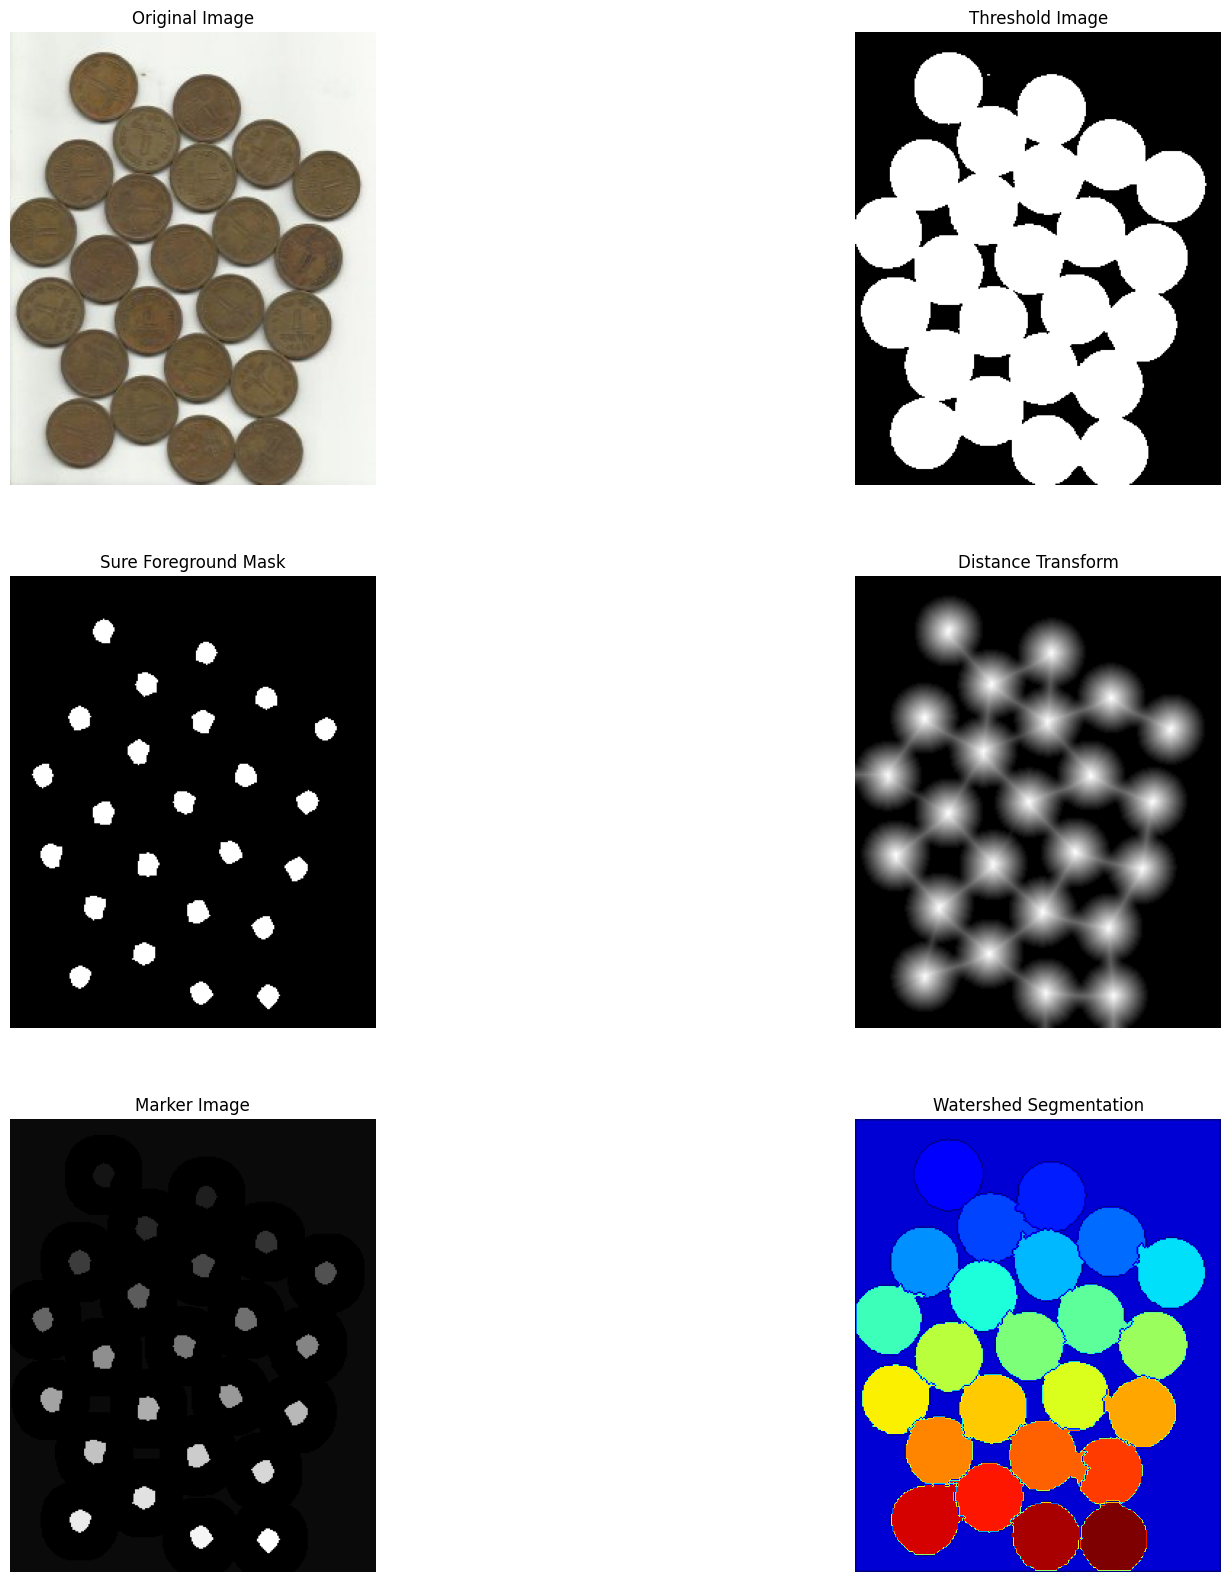

In [ ]:


import cv2
import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread('/content/water_coins.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to obtain a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological opening
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Find sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0
marker1 = markers.copy()

# Apply watershed algorithm
markers = cv2.watershed(img, markers)

# Visualize the results
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Threshold Image')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(sure_fg, cmap='gray')
plt.title('Sure Foreground Mask')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(dist_transform, cmap='gray')
plt.title('Distance Transform')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(marker1, cmap='gray')
plt.title('Marker Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmentation')
plt.axis('off')